In [1]:
include("LiPoSID.jl")
using QuantumOptics
basis = NLevelBasis(2)
using LinearAlgebra
using Plots

## DMD for longer series

In [2]:
# Choose smallers coupling

γᵗˣᵗ = "0.079477"

"0.079477"

### Load exact data

In [3]:
parentdir = pwd()
data_dir = parentdir*"\\DATA\\"

γᵗˣᵗ = "0.079477"

ρᵍₑₓ, tᵍₑₓ = LiPoSID.get_rho_series(data_dir*"State_B1_2CUT_data.h5", γᵗˣᵗ)
ρᵉₑₓ, tᵉₑₓ = LiPoSID.get_rho_series(data_dir*"State_B2_2CUT_data.h5", γᵗˣᵗ)
ρˣₑₓ, tˣₑₓ = LiPoSID.get_rho_series(data_dir*"State_B3_2CUT_data.h5", γᵗˣᵗ)
ρʸₑₓ, tʸₑₓ = LiPoSID.get_rho_series(data_dir*"State_B4_2CUT_data.h5", γᵗˣᵗ)

@assert tᵍₑₓ == tᵉₑₓ == tˣₑₓ == tʸₑₓ 

tₑₓ = convert(Vector{Float64}, tᵉₑₓ)

@assert maximum(diff(tₑₓ)) ≈ minimum(diff(tₑₓ)) ≈ tₑₓ[2]-tₑₓ[1]

Δtₑₓ = tₑₓ[2]-tₑₓ[1]
t_stepsₑₓ = length(tₑₓ)

Δtₑₓ

0.020000000000000004

### Generate ansatz dynamics

In [4]:
Ψᵍ₀ = [1.
       0im]
Ψᵉ₀ = [0im
       1.]
ρᵍ₀ = Ψᵍ₀ * Ψᵍ₀' 
ρᵉ₀ = Ψᵉ₀ * Ψᵉ₀' 
ρˣ₀ = [1.  1 + 0im
       1   1]/2 
ρʸ₀ = [1. -1im
       1im  1]/2

2×2 Matrix{ComplexF64}:
 0.5+0.0im  0.0-0.5im
 0.0+0.5im  0.5+0.0im

In [13]:
Hᵃⁿᶻ = [ 25.           0
         0             1    ]

#γ = parse(Float64, γᵗˣᵗ)

γ = 0

Lᵃⁿᶻ = [ 0    √γ
         0     0. + 0im  ]

#Δt = 0.0005

#n = 1000

#t = range(0, n*Δt, n)
#t = convert(Vector{Float64}, t)

Δtₐₙ = Δtₑₓ

tₐₙ = tₑₓ[1]:Δtₐₙ:5*tₑₓ[end]

t_stepsₐₙ = length(tₐₙ)

#ρᵍₐₙ = LiPoSID.Lindblad_time_evolution(basis, ρᵍ₀, t, Hᵃⁿᶻ, [Lᵃⁿᶻ])
#ρᵉₐₙ = LiPoSID.Lindblad_time_evolution(basis, ρᵉ₀, t, Hᵃⁿᶻ, [Lᵃⁿᶻ])
#ρˣₐₙ = LiPoSID.Lindblad_time_evolution(basis, ρˣ₀, t, Hᵃⁿᶻ, [Lᵃⁿᶻ])
#ρʸₐₙ = LiPoSID.Lindblad_time_evolution(basis, ρʸ₀, t, Hᵃⁿᶻ, [Lᵃⁿᶻ])

ρᵍₐₙ = LiPoSID.Lindblad_time_evolution(basis, ρᵍₑₓ[1], tₐₙ, Hᵃⁿᶻ, [Lᵃⁿᶻ])
ρᵉₐₙ = LiPoSID.Lindblad_time_evolution(basis, ρᵉₑₓ[1], tₐₙ, Hᵃⁿᶻ, [Lᵃⁿᶻ])
ρˣₐₙ = LiPoSID.Lindblad_time_evolution(basis, ρˣₑₓ[1], tₐₙ, Hᵃⁿᶻ, [Lᵃⁿᶻ])
ρʸₐₙ = LiPoSID.Lindblad_time_evolution(basis, ρʸₑₓ[1], tₐₙ, Hᵃⁿᶻ, [Lᵃⁿᶻ])


bᵍₐₙ = LiPoSID.bloch(ρᵍₐₙ)
bᵉₐₙ = LiPoSID.bloch(ρᵉₐₙ)
bˣₐₙ= LiPoSID.bloch(ρˣₐₙ)
bʸₐₙ = LiPoSID.bloch(ρʸₐₙ);


┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to 

### Perform DMD

$\frac{\partial}{\partial t}\mathbf{x} (t) = \mathbf L_0 \mathbf{x} (t)$

$\mathbf{X} := \begin{bmatrix} \mathbf{x}_1 \mathbf{x}_2 \dots \mathbf{x}_{M-1}\end{bmatrix}$

$\mathbf{X}' := \begin{bmatrix} \mathbf{x}_2 \mathbf{x}_3 \dots \mathbf{x}_M \end{bmatrix}$

$ \mathbf{X}' = A \mathbf{X}$

$  A = \mathbf{X}' \operatorname{pinv} ( \mathbf{X} )$

In [14]:
function DMD_A(Xᵍ, Xᵉ, Xˣ, Xʸ)
    
    X⁻=  hcat( Xᵍ[:,1:end-1], Xᵉ[:,1:end-1], Xˣ[:,1:end-1], Xʸ[:,1:end-1]) 
    X⁺ = hcat( Xᵍ[:,2:end],   Xᵉ[:,2:end],   Xˣ[:,2:end], Xʸ[:,2:end]) 
    
    return   X⁺ * pinv(X⁻)
    
end

DMD_A (generic function with 1 method)

In [15]:
function propagate_DMD_A(A, X₀, m) 
    Xˢⁱᵈ = [X₀]
    for i in 2:m
        push!(Xˢⁱᵈ, A*Xˢⁱᵈ[end])
    end
    return hcat(Xˢⁱᵈ...)
end

propagate_DMD_A (generic function with 1 method)

In [16]:
A = DMD_A(bᵍₐₙ, bᵉₐₙ, bˣₐₙ, bʸₐₙ)

3×3 Matrix{Float64}:
  0.886995     -0.461779     5.97485e-14
  0.461779      0.886995     3.95192e-14
 -7.08507e-17   1.01309e-16  1.0

In [17]:
eigen(A)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
3-element Vector{ComplexF64}:
 0.8869948153799496 - 0.46177916783587564im
 0.8869948153799496 + 0.46177916783587564im
  1.000000000000043 + 0.0im
vectors:
3×3 Matrix{ComplexF64}:
  7.18092e-13-0.707107im      7.18092e-13+0.707107im     -5.08705e-14+0.0im
     0.707107-0.0im              0.707107+0.0im           1.41836e-13+0.0im
 -1.08491e-16-1.84889e-32im  -1.08491e-16+1.84889e-32im           1.0+0.0im

In [18]:
bˢⁱᵈ = propagate_DMD_A(A, bˣₐₙ[:,1], t_stepsₐₙ)
ρˢⁱᵈ = LiPoSID.rho_series_from_bloch(bˢⁱᵈ)
fˢⁱᵈ = LiPoSID.fidelity_series(basis, ρˣₐₙ, ρˢⁱᵈ);

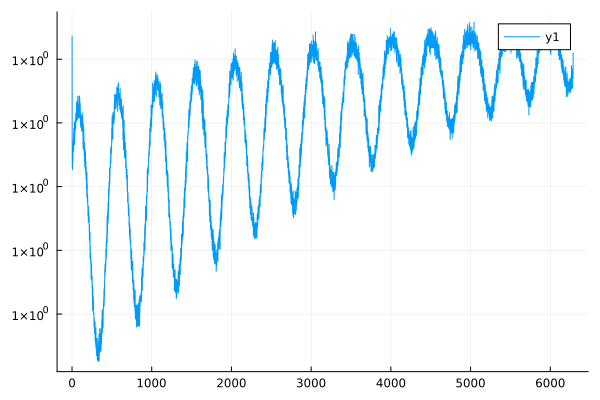

GKS: Possible loss of precision in routine SET_WINDOW


In [19]:
plot(fˢⁱᵈ)

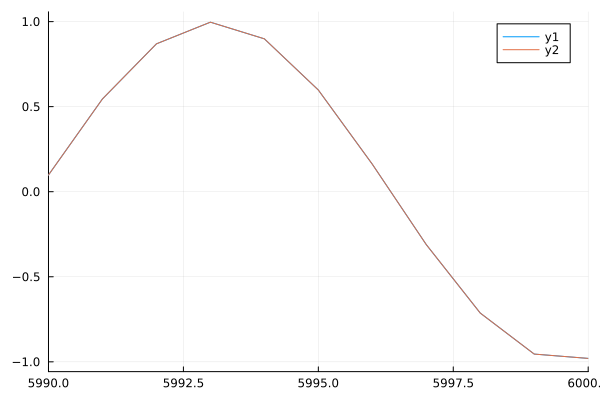

In [24]:
plot(bˢⁱᵈ[1,:])
plot!(bˣₐₙ[1,:])
xlims!(5990,6000)